In [1]:
import gym
env = gym.make('gym_dynamic_multi_armed_bandit.envs:basic-v0')
env.reset()

import matplotlib.pyplot as plt
from random import randint

import numpy as np
import pandas as pd

In [2]:
env.step(0)

(array([0.0062551, 0.       ]), 0.3127549303776135, False, {'latent_state': 1})

In [15]:
nb_step = 20000

In [16]:
# Boucle d’interaction
states = []

for _ in range(nb_step):
    observation, reward, done, info = env.step(randint(0, 1))
    states.append(env.latent_state)
    if done:
        observation = env.reset()
env.close()

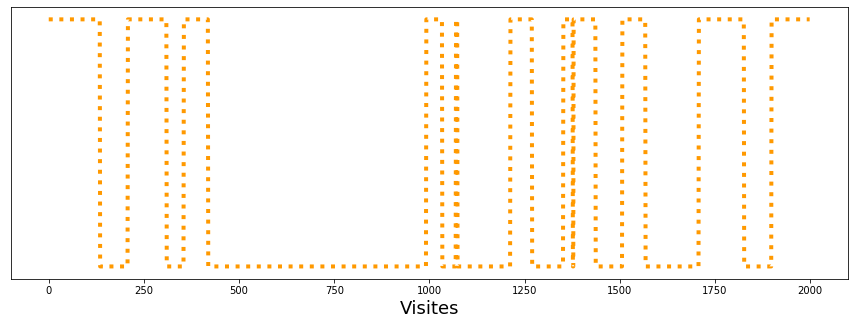

In [70]:
fig, ax = plt.subplots(figsize=(15, 5))
t=2000
ax.plot(range(len(states[:t])), [x/20 for x in states[:t]], color="#ff9900", linestyle=":", linewidth=4)
# ax.plot(range(len(states[:t])), [(1 - x)/20 for x in states[:t]], color="#0097a7", linestyle=":", linewidth=4)
ax.set_xlabel("Visites", fontsize=18)
ax.get_yaxis().set_visible(False)
fig.savefig("dynamic_state_graph_option1.png")

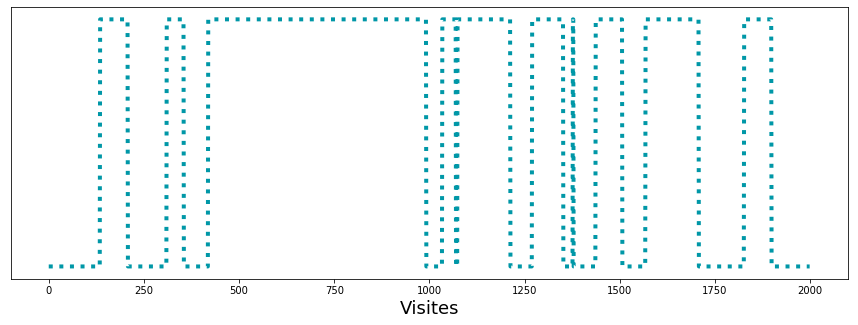

In [69]:
fig, ax = plt.subplots(figsize=(15, 5))
t=2000
#ax.plot(range(len(states[:t])), [x/20 for x in states[:t]], color="#ff9900", linestyle=":", linewidth=4)
ax.plot(range(len(states[:t])), [(1 - x)/20 for x in states[:t]], color="#0097a7", linestyle=":", linewidth=4)
ax.set_xlabel("Visites", fontsize=18)
ax.get_yaxis().set_visible(False)
fig.savefig("dynamic_state_graph_option2.png")

# Stratégie Random

In [19]:
# Boucle d’interaction
actions_random = []
rewards_random = []
states_random = []

for _ in range(nb_step):
    # env.render() # renvoie une sortie vidéo, sans cela on ne renvoie rien
    # action = env.action_space.sample() # your agent here (this takes random actions)
    action = randint(0, 1)
    observation, reward, done, info = env.step(action)
    
    actions_random.append(action)
    rewards_random.append(reward)
    states_random.append(env.latent_state)
    
    if done:
        observation = env.reset()
env.close()

# Stratégie constante

In [20]:
# Boucle d’interaction
actions_strat_const1 = []
rewards_strat_const1 = []
states_strat_const1 = []

for _ in range(nb_step):
        
    observation, reward, done, info = env.step(1)
    
    actions_strat_const1.append(1)
    rewards_strat_const1.append(reward)
    states_strat_const1.append(env.latent_state)
    
    if done:
        observation = env.reset()
env.close()

In [21]:
# Boucle d’interaction
actions_strat_const0 = []
rewards_strat_const0 = []
states_strat_const0 = []

for _ in range(nb_step):
        
    observation, reward, done, info = env.step(0)
    
    actions_strat_const0.append(0)
    rewards_strat_const0.append(reward)
    states_strat_const0.append(env.latent_state)
    
    if done:
        observation = env.reset()
env.close()

# Stratégie optimale

In [22]:
# Boucle d’interaction
actions_optim = []
rewards_optim = []
states_optim = []

for _ in range(nb_step):
    # env.render() # renvoie une sortie vidéo, sans cela on ne renvoie rien
    # action = env.action_space.sample() # your agent here (this takes random actions)
    #if observation[1] < 250 :
    #    action = 1 - int(round(observation[0]))
    #else:
    #    action = int(round(observation[0]))
    action = env.latent_state
    
    # action = randint(0, 1)
    observation, reward, done, info = env.step(action)
    
    actions_optim.append(action)
    rewards_optim.append(reward)
    states_optim.append(env.latent_state)
    
    if done:
        observation = env.reset()
env.close()

In [23]:
def sum_rewards_by_10(rewards):
    rewards_sum_10 = []
    for i in range(int(len(rewards)/10)):
        rewards_sum_10.append((np.sum(rewards[i*10:(i+1)*10])))
    
    return rewards_sum_10

In [27]:
results_rl_0 = pd.read_csv("./experiments/log/"\
                           "worker_0.simple_rl_graph.main_level.main_level.agent_0.csv")
results_rl_1 = pd.read_csv("./experiments/log/"\
                           "worker_0.simple_rl_graph.main_level.main_level.agent_1.csv")

In [29]:
365*2

730

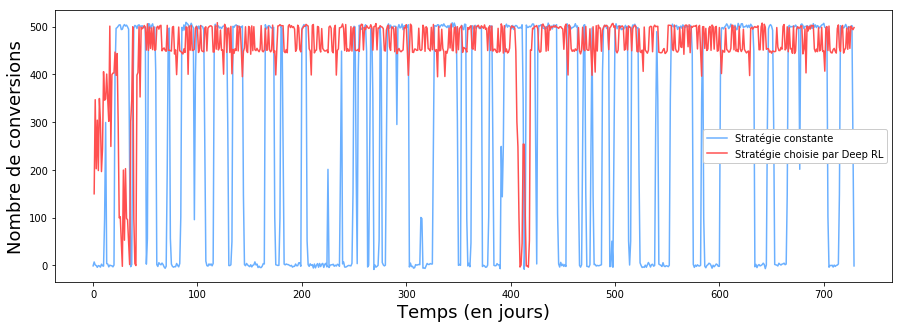

In [30]:
t = 730
plt.figure(figsize=(15,5))
plt.plot(sum_rewards_by_10(rewards_strat_const1)[:t], color="#6BB0ff")
plt.plot(results_rl_1["Training Reward"][:t], color="#ff5050")

plt.ylabel("Nombre de conversions", fontsize=18)
plt.xlabel("Temps (en jours)", fontsize=18)

plt.legend(["Stratégie constante", "Stratégie choisie par Deep RL"], framealpha=1)

In [53]:
def plot_and_save_comparison(t):
    plt.figure(figsize=(15,5))
    plt.plot(sum_rewards_by_10(rewards_strat_const1)[:t], color="#6BB0ff")
    plt.plot(results_rl_1["Training Reward"][:t], color="#ff5050")

    plt.ylabel("Revenu additionnel", fontsize=18)
    plt.xlabel("Temps (en jours)", fontsize=18)

    revenu_random = round(np.sum(sum_rewards_by_10(rewards_strat_const1)[:t]))
    revenu_deep_rl = round(np.sum(results_rl_1["Training Reward"][:t]))
    
    plt.legend(["Stratégie constante : {}€".format(revenu_random), 
                "Stratégie choisie par Deep RL : {}€".format(revenu_deep_rl)], framealpha=1)
    plt.savefig("comparaison_random_deep_rl_{}_jours.png".format(t))
    plt.show()

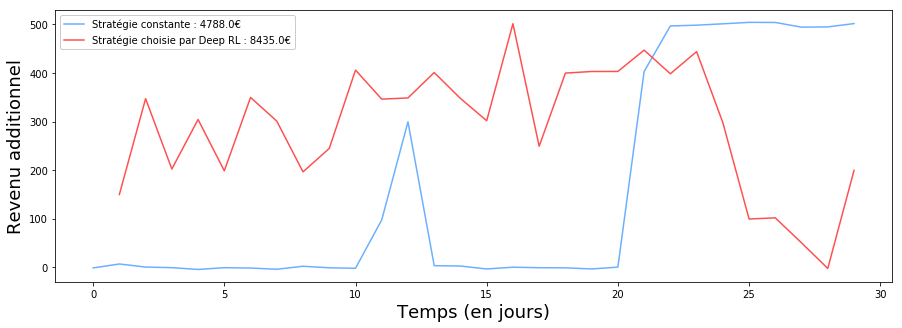

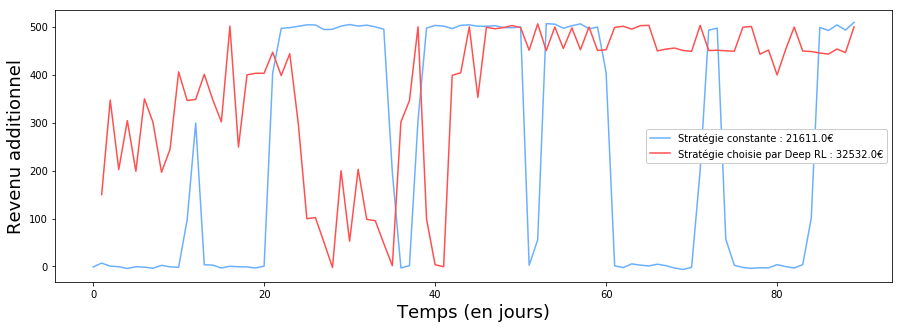

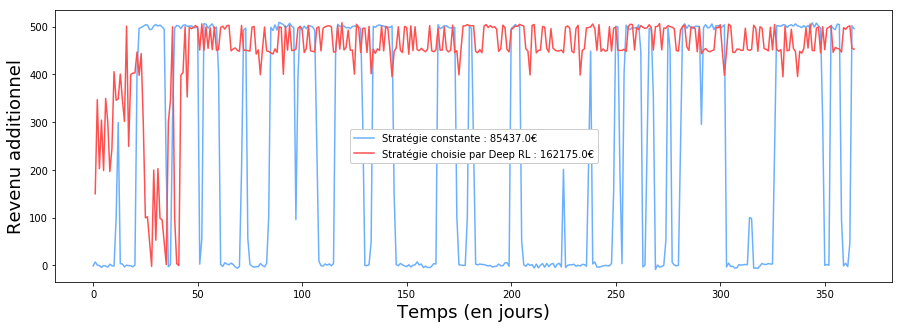

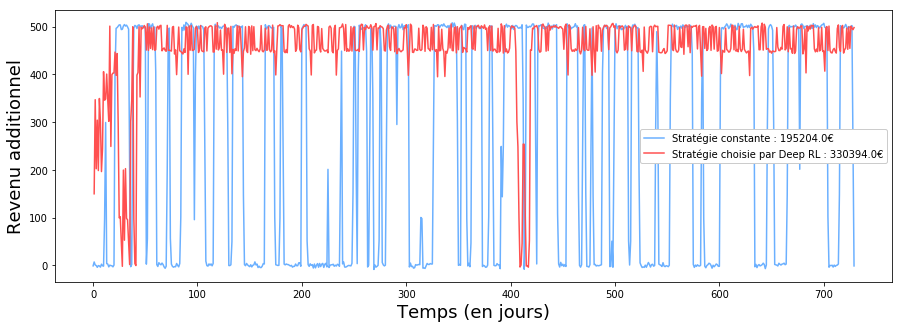

In [55]:
for i in [30, 90, 365, 730]:
    plot_and_save_comparison(t=i)